In [5]:
!pip install openpyxl

In [25]:
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [26]:
df = df = pd.read_excel('Online_Retail.xlsx')

In [27]:
# Fetch the first 5 rows from the dataset
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Let's clean the data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [56]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.0
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.69057
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.0
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.0
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.0
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.0
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.0
std,248.693370,NaN,69.315162,1713.600303


In [37]:
# Check for duplicates

In [38]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [39]:
#Check NaN Values

In [40]:
df.isnull().values.any()

True

In [41]:
(df.isnull().any())

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [54]:
# Check for missing values

missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [52]:
#Drop the rows with missing values
df = df.dropna(subset=['CustomerID', 'InvoiceDate'])

In [61]:
#Convert these columns to integer

df['CustomerID'] = df['CustomerID'].astype('Int64') 


In [64]:
df['InvoiceNo'] = df['InvoiceNo'].str.extract('(\d+)', expand=False)

In [65]:
df['InvoiceNo'] = df['InvoiceNo'].astype('Int64')

In [66]:
#Check the Data Types
df.dtypes

InvoiceNo               Int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object

## Feature Engineering

In [67]:
##  Calculate the total value for each transaction.

In [70]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [71]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,TotalPrice
0,<NA>,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,15.30
1,<NA>,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
2,<NA>,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,22.00
3,<NA>,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
4,<NA>,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,<NA>,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,10.20
541905,<NA>,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12.60
541906,<NA>,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60
541907,<NA>,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,16.60


## Recency, Frequency, and Monetary (RFM) Metrics:

In [72]:
# Recency: How recently each customer made a purchase (calculated as the difference in days from the last purchase).
# Frequency: How often the customer has purchased items.
# Monetary: The total monetary value spent by the customer.

In [73]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)  # Take the last purchase date and add 1 day to prevent zero recency
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency (days since last purchase)
    'InvoiceNo': 'count',  # Frequency (total number of purchases)
    'TotalPrice': 'sum'  # Monetary (total spending)
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


## Scaling the Data to normalize them

In [75]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [76]:
rfm_scaled

array([[ 2.32202285, -0.14126436, -0.23100099],
       [-0.89373323, -0.27751139,  0.29343167],
       [-0.1691956 , -0.27751139, -0.01231622],
       ...,
       [-0.83418219, -0.14126436, -0.20951263],
       [-0.87388289, -0.27751139,  0.02390005],
       [-0.48680114, -0.27751139, -0.00744423]])

In [77]:
# Determine the Optimal Number of Clusters using the elbow method or silhouette score.

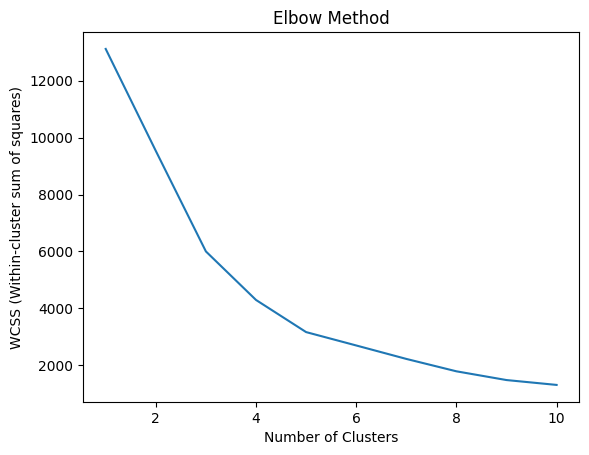

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


In [79]:
# Fit the K-Means model using the optimal number of clusters and assign customers to clusters

In [80]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


C:\Users\Usman\anaconda3\envs\tf_gpu_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [81]:
# Cluster Profiling

In [82]:
cluster_summary = rfm.groupby('Cluster').mean()
print(cluster_summary)


            Recency  Frequency       Monetary
Cluster                                      
0         41.439887   1.491860    1624.538595
1        248.712303   0.656799     475.638373
2          7.000000  63.142857  168745.324286
3         12.933333  33.200000   15732.302111


In [83]:
# Visualization

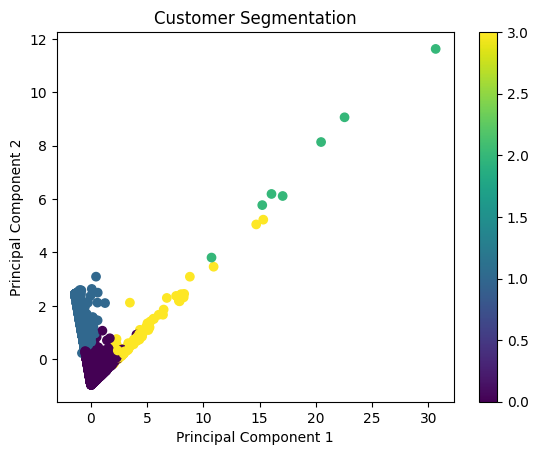

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation')
plt.colorbar()
plt.show()
